In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e4/sample_submission.csv
/kaggle/input/playground-series-s5e4/train.csv
/kaggle/input/playground-series-s5e4/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
sample=pd.read_csv('/kaggle/input/playground-series-s5e4/sample_submission.csv')

In [3]:
print(train.head())


   id     Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
0   0  Mystery Matters    Episode 98                     NaN  True Crime   
1   1    Joke Junction    Episode 26                  119.80      Comedy   
2   2   Study Sessions    Episode 16                   73.90   Education   
3   3   Digital Digest    Episode 45                   67.17  Technology   
4   4      Mind & Body    Episode 86                  110.51      Health   

   Host_Popularity_percentage Publication_Day Publication_Time  \
0                       74.81        Thursday            Night   
1                       66.95        Saturday        Afternoon   
2                       69.97         Tuesday          Evening   
3                       57.22          Monday          Morning   
4                       80.07          Monday        Afternoon   

   Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
0                          NaN            0.0          Positive   
1           

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
train.describe

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.describe of             id      Podcast_Name Episode_Title  Episode_Length_minutes  \
0            0   Mystery Matters    Episode 98                     NaN   
1            1     Joke Junction    Episode 26                  119.80   
2            2    Study Sessions    Episode 16                   73.90   
3            3    Digital Digest    Episode 45                   67.17   
4            4       Mind & Body    Episode 86                  110.51   
...        ...               ...           ...                     ...   
749995  749995      Learning Lab    Episode 25                   75.66   
749996  749996   Business Briefs    Episode 21                   75.75   
749997  749997  Lifestyle Lounge    Episode 51                   30.98   
749998  749998       Style Guide    Episode 47                  108.98   
749999  749999    Sports Central    Episode 99                   24.10   

             Genre  Host_Popularity_percentage Publication_Day  \
0       Tru

In [5]:
train.info

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of             id      Podcast_Name Episode_Title  Episode_Length_minutes  \
0            0   Mystery Matters    Episode 98                     NaN   
1            1     Joke Junction    Episode 26                  119.80   
2            2    Study Sessions    Episode 16                   73.90   
3            3    Digital Digest    Episode 45                   67.17   
4            4       Mind & Body    Episode 86                  110.51   
...        ...               ...           ...                     ...   
749995  749995      Learning Lab    Episode 25                   75.66   
749996  749996   Business Briefs    Episode 21                   75.75   
749997  749997  Lifestyle Lounge    Episode 51                   30.98   
749998  749998       Style Guide    Episode 47                  108.98   
749999  749999    Sports Central    Episode 99                   24.10   

             Genre  Host_Popularity_percentage Publication_Day  \
0       True 

In [6]:
test.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive


In [7]:
test.describe

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.describe of             id         Podcast_Name Episode_Title  Episode_Length_minutes  \
0       750000  Educational Nuggets    Episode 73                   78.96   
1       750001          Sound Waves    Episode 23                   27.87   
2       750002        Joke Junction    Episode 11                   69.10   
3       750003        Comedy Corner    Episode 73                  115.39   
4       750004         Life Lessons    Episode 50                   72.32   
...        ...                  ...           ...                     ...   
249995  999995          Mind & Body   Episode 100                   21.05   
249996  999996        Joke Junction    Episode 85                   85.50   
249997  999997        Joke Junction    Episode 63                   12.11   
249998  999998       Market Masters    Episode 46                  113.46   
249999  999999          Brain Boost    Episode 46                   78.05   

            Genre  Host_Popularity_percen

In [8]:
test.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [9]:
sample.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [10]:
# Extract numeric part from 'Episode_Title'
train['Episode_Number'] = train['Episode_Title'].str.extract('(\d+)').astype(float)
test['Episode_Number'] = test['Episode_Title'].str.extract('(\d+)').astype(float)

print(train[['Episode_Title', 'Episode_Number']].head())


  Episode_Title  Episode_Number
0    Episode 98            98.0
1    Episode 26            26.0
2    Episode 16            16.0
3    Episode 45            45.0
4    Episode 86            86.0


In [11]:
# Fill missing Episode_Length
train['Episode_Length_minutes'] = train['Episode_Length_minutes'].fillna(train['Episode_Length_minutes'].mean())
test['Episode_Length_minutes'] = test['Episode_Length_minutes'].fillna(test['Episode_Length_minutes'].mean())

# Fill missing Guest_Popularity
train['Guest_Popularity_percentage'] = train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].mean())
test['Guest_Popularity_percentage'] = test['Guest_Popularity_percentage'].fillna(test['Guest_Popularity_percentage'].mean())

# Verify no missing values
print("Train missing:\n", train.isnull().sum())
print("Test missing:\n", test.isnull().sum())


Train missing:
 id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  1
Episode_Sentiment              0
Listening_Time_minutes         0
Episode_Number                 0
dtype: int64
Test missing:
 id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Episode_Number                 0
dtype: int64


In [12]:
print(train['Genre'].unique())


['True Crime' 'Comedy' 'Education' 'Technology' 'Health' 'News' 'Music'
 'Sports' 'Business' 'Lifestyle']


In [13]:
print(train['Episode_Sentiment'].unique())

['Positive' 'Negative' 'Neutral']


In [14]:
print(train['Publication_Time'].unique())

['Night' 'Afternoon' 'Evening' 'Morning']


In [15]:
print(train['Publication_Day'].unique())

['Thursday' 'Saturday' 'Tuesday' 'Monday' 'Sunday' 'Wednesday' 'Friday']


# EDA & Visualization


Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64


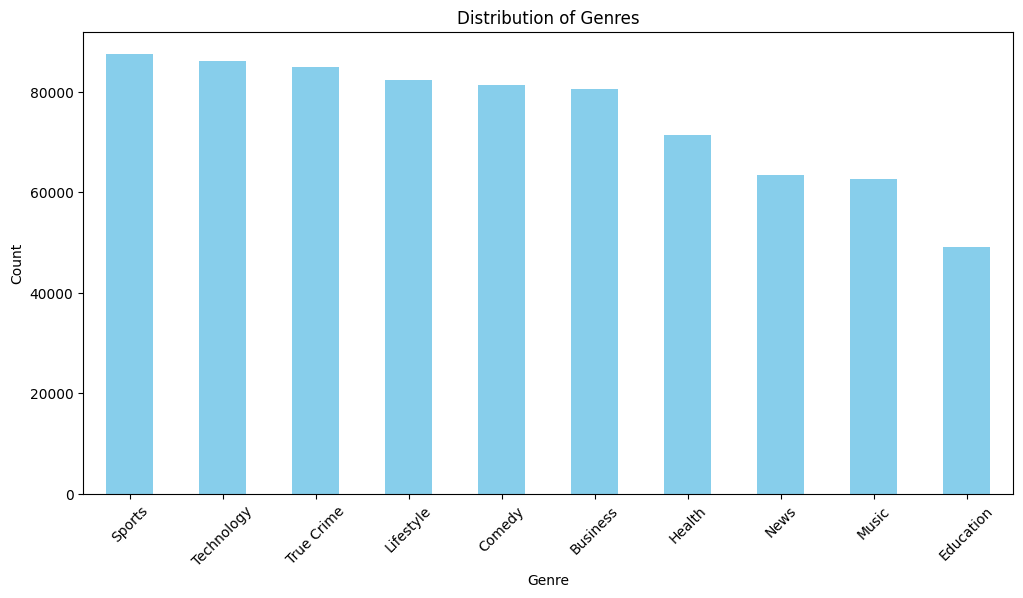

In [16]:
# Checking unique genres and their counts in the train dataset
genre_counts = train['Genre'].value_counts()

# Display the result
print(genre_counts)

# Plotting the genre distribution
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


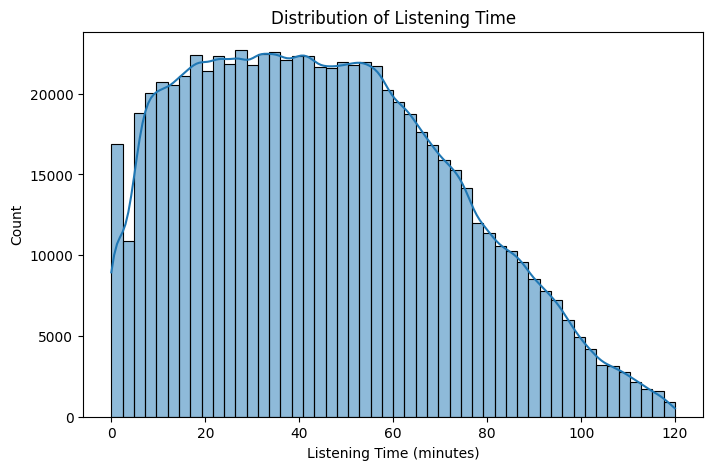

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(train['Listening_Time_minutes'], kde=True, bins=50)
plt.title("Distribution of Listening Time")
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Count")
plt.show()


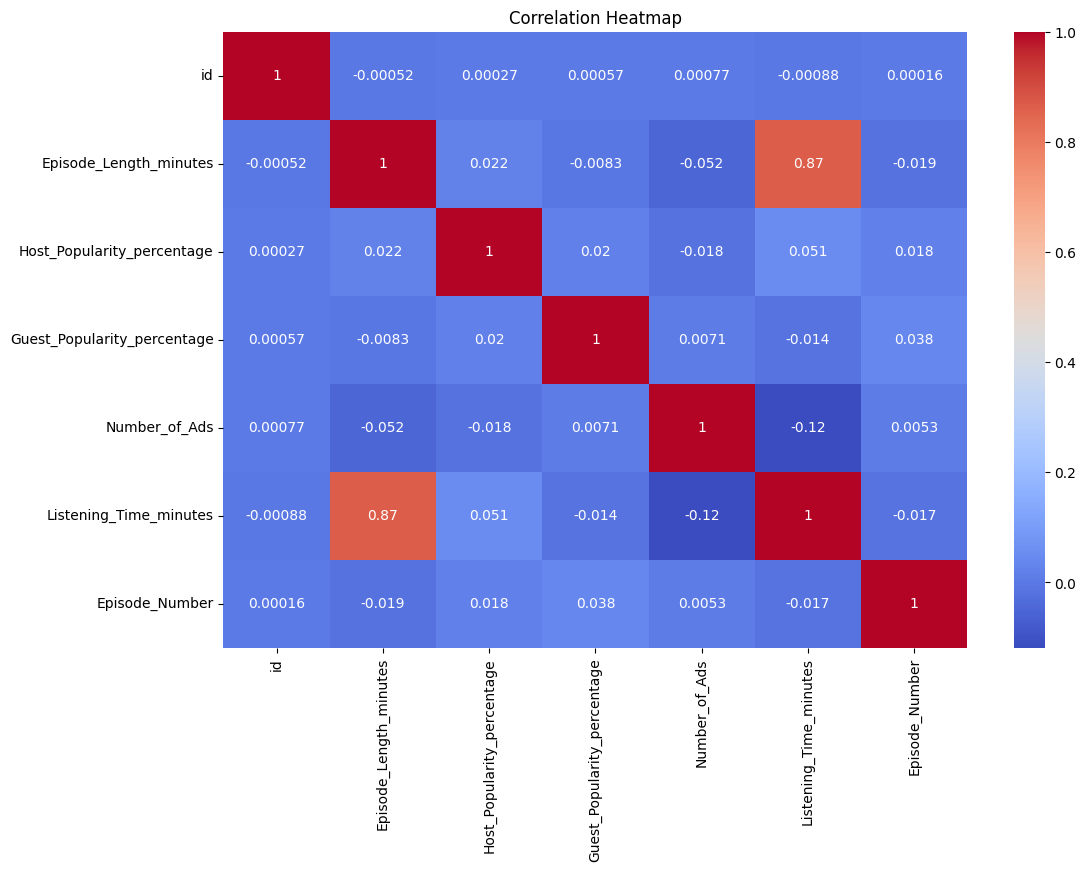

In [18]:
import numpy as np

numeric_cols = train.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


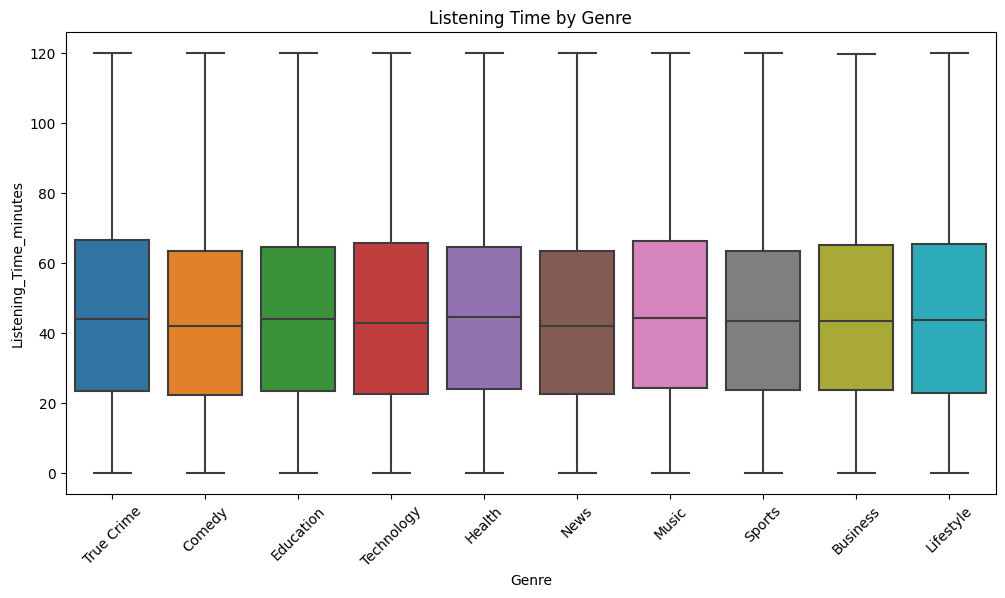

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Genre', y='Listening_Time_minutes')
plt.title('Listening Time by Genre')
plt.xticks(rotation=45)
plt.show()


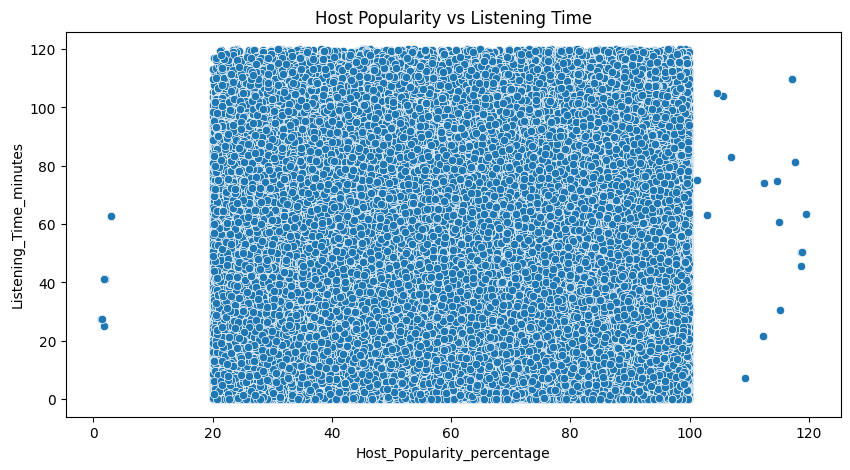

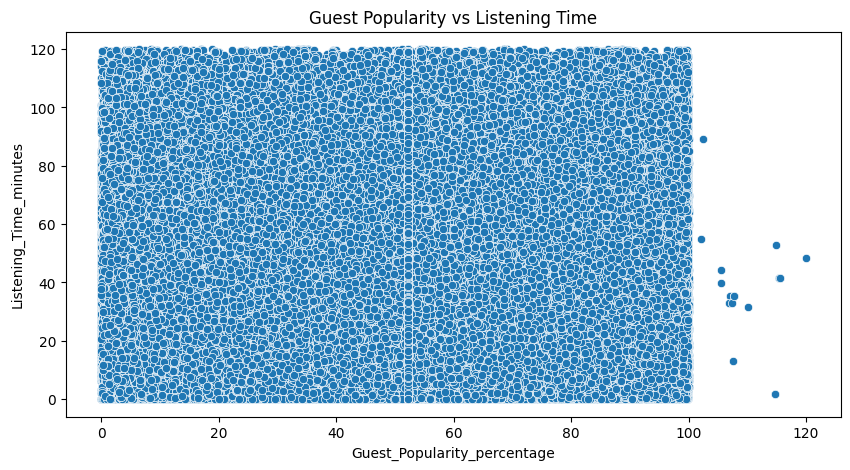

In [20]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='Host_Popularity_percentage', y='Listening_Time_minutes')
plt.title('Host Popularity vs Listening Time')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x='Guest_Popularity_percentage', y='Listening_Time_minutes')
plt.title('Guest Popularity vs Listening Time')
plt.show()


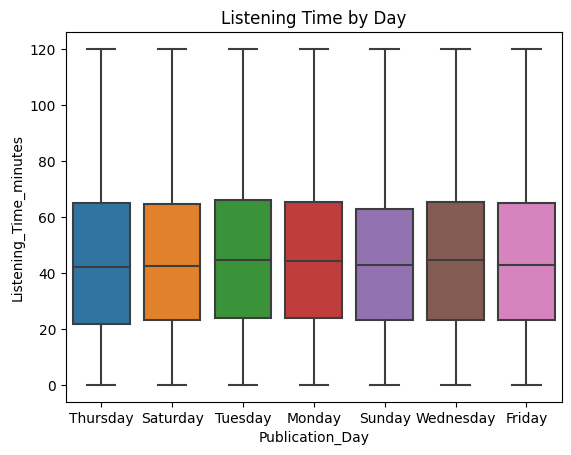

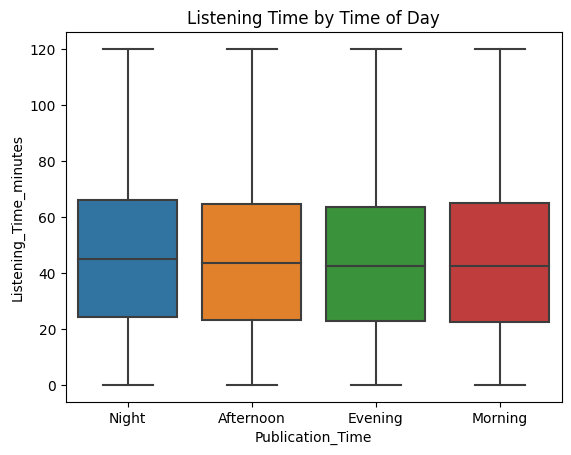

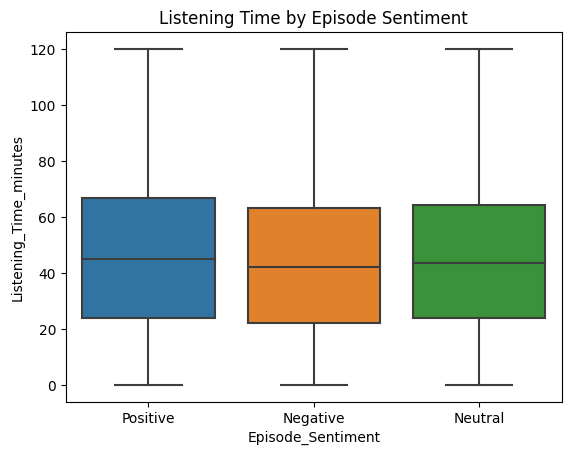

In [21]:
sns.boxplot(data=train, x='Publication_Day', y='Listening_Time_minutes')
plt.title('Listening Time by Day')
plt.show()

sns.boxplot(data=train, x='Publication_Time', y='Listening_Time_minutes')
plt.title('Listening Time by Time of Day')
plt.show()

sns.boxplot(data=train, x='Episode_Sentiment', y='Listening_Time_minutes')
plt.title('Listening Time by Episode Sentiment')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

# Dictionary to store encoders for each column
encoders = {}

# Encode each column and store the encoder
for col in cat_cols:
    encoders[col] = LabelEncoder()  # Create a new encoder for this column
    train[col] = encoders[col].fit_transform(train[col])
    test[col] = encoders[col].transform(test[col])  # Use same encoder for test

# Print mapping of encoded values to original categories for each column
for col in cat_cols:
    print(f"{col} Mapping:")
    for i, label in enumerate(encoders[col].classes_):
        print(f"{i}: {label}")
    print()  # Add a blank line for readability

# Print first few rows of encoded columns
print("Encoded Train Data (First 5 Rows):")
print(train[cat_cols].head())

Genre Mapping:
0: Business
1: Comedy
2: Education
3: Health
4: Lifestyle
5: Music
6: News
7: Sports
8: Technology
9: True Crime

Publication_Day Mapping:
0: Friday
1: Monday
2: Saturday
3: Sunday
4: Thursday
5: Tuesday
6: Wednesday

Publication_Time Mapping:
0: Afternoon
1: Evening
2: Morning
3: Night

Episode_Sentiment Mapping:
0: Negative
1: Neutral
2: Positive

Encoded Train Data (First 5 Rows):
   Genre  Publication_Day  Publication_Time  Episode_Sentiment
0      9                4                 3                  2
1      1                2                 0                  0
2      2                5                 1                  0
3      8                1                 2                  2
4      3                1                 0                  1


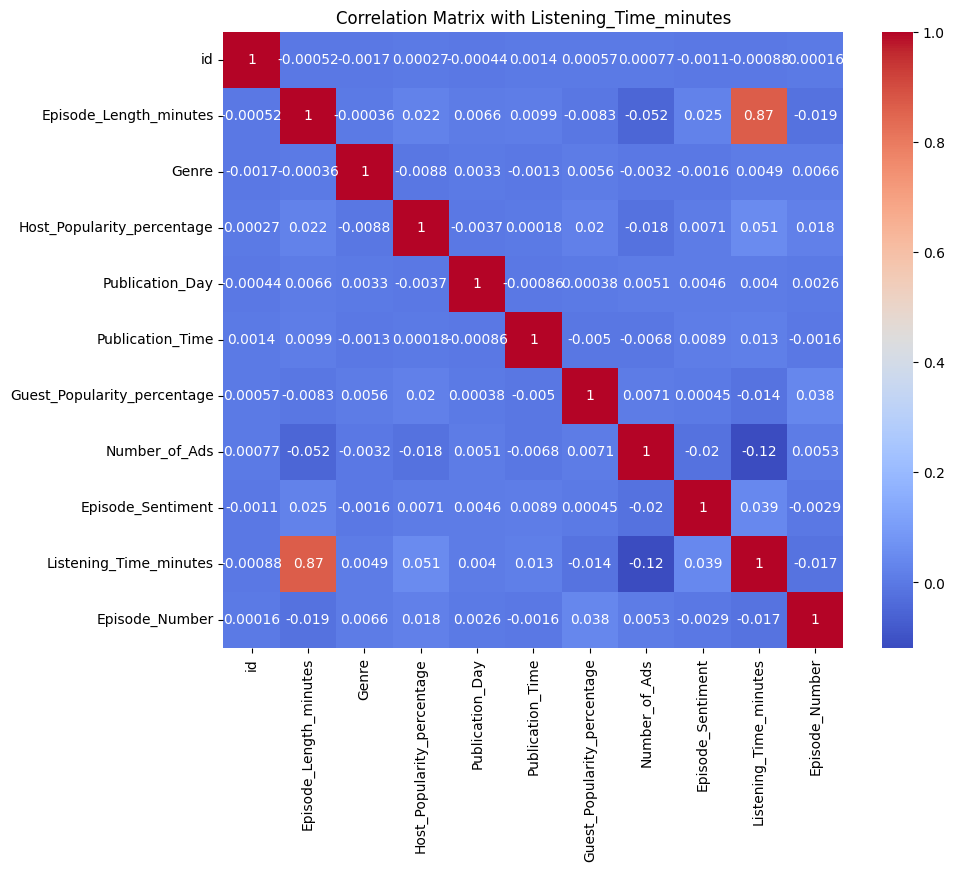

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Listening_Time_minutes")
plt.show()


# Feature Engineering


In [24]:
#Total Popularity (Host + Guest)
train['Total_Popularity'] = train['Host_Popularity_percentage'] + train['Guest_Popularity_percentage']


In [25]:
# Ads Per Minute (Ad density):
train['Ads_Per_Minute'] = train['Number_of_Ads'] / (train['Episode_Length_minutes'] + 1e-5)  # +1e-5 to avoid zero division


In [26]:
#Is Weekend (Saturday-Sunday detection):
train['Is_Weekend'] = train['Publication_Day'].apply(lambda x: 1 if x in [5, 6] else 0)


In [27]:
#Is Morning (Based on encoded Publication_Time, assume 0 = morning):

train['Is_Morning'] = train['Publication_Time'].apply(lambda x: 1 if x == 0 else 0)


In [28]:
# Apply same feature engineering to test set
# Total Popularity
test['Total_Popularity'] = test['Host_Popularity_percentage'] + test['Guest_Popularity_percentage']

# Ads Per Minute - handle division + inf + NaN cleanly
test['Ads_Per_Minute'] = test['Number_of_Ads'] / test['Episode_Length_minutes']
test['Ads_Per_Minute'] = test['Ads_Per_Minute'].replace([np.inf, -np.inf], 0)
test['Ads_Per_Minute'] = test['Ads_Per_Minute'].fillna(0)

# Is Weekend (Saturday=5, Sunday=6)
test['Is_Weekend'] = test['Publication_Day'].apply(lambda x: 1 if x in [5, 6] else 0)

# Is Morning (5 AM to 11 AM)
test['Is_Morning'] = test['Publication_Time'].apply(lambda x: 1 if 5 <= x <= 11 else 0)


# Features and Inputs


In [29]:
features = [
    'Episode_Length_minutes',
    'Genre',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads',
    'Episode_Sentiment',
    'Episode_Number',
    'Publication_Day',
    'Publication_Time',
    'Total_Popularity',          # engineered
    'Ads_Per_Minute',            # engineered
    'Is_Weekend',                # engineered
    'Is_Morning'                 # engineered
]

target = 'Listening_Time_minutes'


In [30]:
X = train[features]
y = train[target]


# Model Traning & hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100,200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Base model
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit on training data
grid_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE: 12.983704088758701


In [32]:

final_model = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

final_model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [33]:
preds = final_model.predict(test[features])


In [34]:
sample.head(5)


,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


# Final Prediction

In [35]:
# Step 1: Copy sample submission
df_sub = sample.copy()

# Step 2: Insert predictions
df_sub['Listening_Time_minutes'] = preds   # ya test_preds, jo bhi variable hai tere predictions ka

# Step 3: Save as submission.csv
df_sub.to_csv('submission.csv', index=False)

# Step 4: (Optional) Check the first few rows
df_sub.head()




,id,Listening_Time_minutes
0,750000,55.155777
1,750001,17.761530
2,750002,50.351517
3,750003,78.699432
4,750004,50.213165
